In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import clima_anom as ca
import cartopy
import cartopy.crs as ccrs

In [2]:
data_dir = '../data/Hgt_500hPa_Anomalies_Jan80_Dec83.nc'

data = ca.read_netcdf(data_dir,2)
lat = data['lat']
lon = data['lon']
hgt = data['var']

lat : (73,)
lon : (144,)
time : (48,)
var : (48, 73, 144)


In [3]:
test = ca.extract_shapefile('../shp/continent.shp',hgt,lat,lon)

In [4]:
lon2d, lat2d = np.meshgrid(lon, lat)

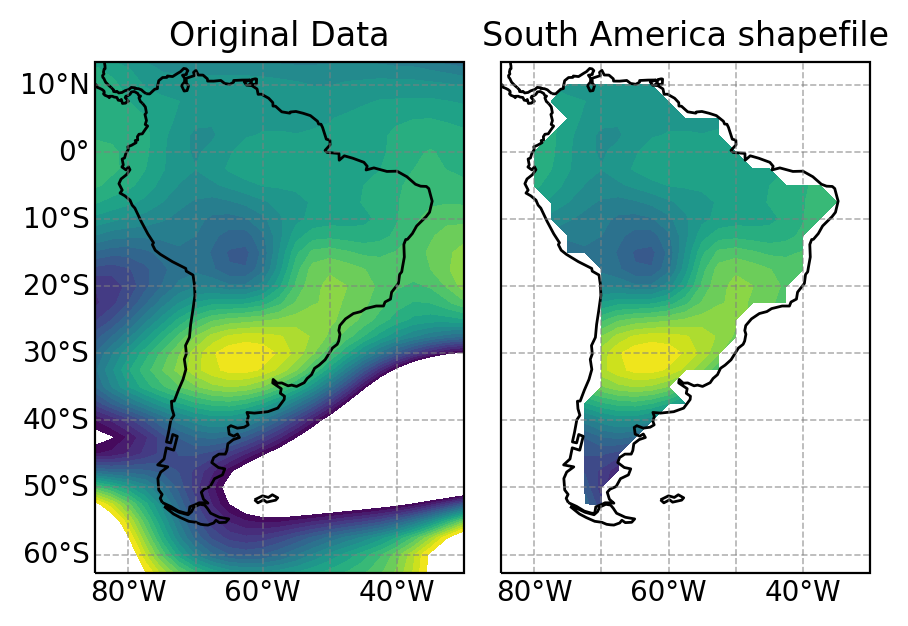

In [5]:
levels = np.arange(-25,17,2)

fig = plt.figure(figsize=(5,6),dpi=200)

proj = ccrs.PlateCarree()
gs = gridspec.GridSpec(1,2)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines()
ax1.set_extent([-85,-30,-60,12])
a1 = ax1.contourf(lon2d, lat2d, hgt[0,:,:],levels=levels)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
ax1.title.set_text('Original Data')

ax2 = plt.subplot(gs[0, 1], projection = proj)
ax2.coastlines()
ax2.set_extent([-85,-30,-60,12])
a2 = ax2.contourf(lon2d, lat2d, test[0,:,:],levels=levels)
gl = ax2.gridlines(crs=proj,draw_labels=True,linewidth=0.6,color='gray',alpha=0.6,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
ax2.title.set_text('South America shapefile')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, hspace=0.1, wspace=0.1)

plt.savefig('../fig/Extract_shapefile.png',transparent = False,bbox_inches ='tight',pad_inches = 0.1)